# Importation des données météo et simplification du df

**Commentaires:**
- Le data-set est réccupéré sur le site: https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/table/?sort=date
- Le data-set est sélectionné aux mêmes dates que le df compteur vélo (de 2018-01-01 à 2021-05-29)
- Les données météos proviennent de la ville d'Athis-Mons (91), seul compteur disponible en île-de-France

In [2]:
# Import library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Définition du chemin d'accès:
### Céline
%cd C:\Users\Céline Doussot\Desktop\GitHub\ParisPyVelib_Datas
### Hermine

### Tarik
#%cd C:\Users\Home\Documents\Git\ParisPyVelib\Data

C:\Users\Céline Doussot\Desktop\GitHub\ParisPyVelib_Datas


In [2]:
df = pd.read_csv('donnees-synop-essentielles-omm.csv', sep =';')
df.head()

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Latitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
0,7149,2018-01-02T01:00:00+01:00,101370.0,330.0,1.0,270.0,4.3,279.95,276.75,80.0,...,48.716833,Athis-Mons,91027,Métropole du Grand Paris,200054781,Essonne,91,Île-de-France,11,1
1,7149,2018-01-03T10:00:00+01:00,100540.0,530.0,1.0,270.0,7.7,280.75,276.75,76.0,...,48.716833,Athis-Mons,91027,Métropole du Grand Paris,200054781,Essonne,91,Île-de-France,11,1
2,7149,2018-01-05T19:00:00+01:00,100220.0,140.0,3.0,210.0,1.5,280.85,277.45,79.0,...,48.716833,Athis-Mons,91027,Métropole du Grand Paris,200054781,Essonne,91,Île-de-France,11,1
3,7149,2018-02-28T01:00:00+01:00,101720.0,-60.0,8.0,70.0,2.5,265.65,259.65,62.0,...,48.716833,Athis-Mons,91027,Métropole du Grand Paris,200054781,Essonne,91,Île-de-France,11,2
4,7149,2018-02-26T16:00:00+01:00,102350.0,-130.0,6.0,60.0,10.0,272.65,259.05,35.0,...,48.716833,Athis-Mons,91027,Métropole du Grand Paris,200054781,Essonne,91,Île-de-France,11,2


In [3]:
# Création d'une fonction renvoyant un df_info plus complet que .info() classé par ordre des NANs
def info(df):
### Top 5 des modalités les plus utilisées par colonne:
    Mode_order = np.empty((len(df.columns), 10))
    Mode_order[:] = np.nan
    Mode_order = pd.DataFrame(Mode_order, index = df.columns, columns = ['Mode1','Mode2','Mode3','Mode4','Mode5',
                                                                     'count1','count2','count3','count4','count5'])
    for i , col in enumerate (df.columns):
        for j in range(min(5,len(df[col].value_counts().index))):
            Mode_order.iloc[i,j] = df[col].value_counts().index[j]
            Mode_order.iloc[i,j+5] = list(df[col].value_counts())[j]
    new_order = [0,5,1,6,2,7,3,8,4,9]
    Mode_order = Mode_order[Mode_order.columns[new_order]]
### Création du df_info
    df_info = pd.DataFrame({'NotNull':df.notnull().sum(),'NAN': df.isna().sum(), 'Dtype': df.dtypes, 'Mode_count': df.nunique()})
    df_info = df_info.join(Mode_order)
    df_info.sort_values(by = 'NAN', ascending=False, inplace=True)
    return df_info

In [4]:
# Affichage des infos
df_info = info(df)
df_info

,NotNull,NAN,Dtype,Mode_count,Mode1,count1,Mode2,count2,Mode3,count3,Mode4,count4,Mode5,count5
Niveau barométrique,0,9944,float64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phénomène spécial 4,0,9944,float64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Géopotentiel,0,9944,float64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phénomène spécial 1,0,9944,float64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Température maximale sur 24 heures,0,9944,float64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nom,9944,0,object,1,ORLY,9944.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coordonnees,9944,0,object,1,"48.716833,2.384333",9944.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,9944,0,object,9944,2018-11-15T13:00:00+01:00,1.0,2019-08-19T20:00:00+02:00,1.0,2018-04-01T08:00:00+02:00,1.0,2020-06-05T08:00:00+02:00,1.0,2020-05-09T05:00:00+02:00,1.0
Periode de mesure de la rafale,9944,0,float64,1,-10,9944.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
- Beaucoup trop de colonnes sont présentes pour notre utilisation
- Certaines colonnes possèdent que des NANs

**Next Step:**
- Identifier les colonnes à conserver
- Convertir la col 'Date' en format datetime
- Enregistrer le df obtenu

In [5]:
# Identifier les colonnes à conserver
list(df_info.index)

['Niveau barométrique',
 'Phénomène spécial 4',
 'Géopotentiel',
 'Phénomène spécial 1',
 'Température maximale sur 24 heures',
 'Méthode de mesure Température du thermomètre mouillé',
 'Température du thermomètre mouillé',
 'Phénomène spécial 3',
 'Phénomène spécial 2',
 'Température minimale sur 24 heures (°C)',
 'Température maximale sur 24 heures (°C)',
 'Température minimale sur 24 heures',
 'Température minimale du sol sur 12 heures',
 'Température minimale du sol sur 12 heures (en °C)',
 'Hauteur de base 4',
 'Nébulosité couche nuageuse 4',
 'Type nuage 4',
 'Type nuage 3',
 'Hauteur de base 3',
 'Nébulosité couche nuageuse 3',
 'Température minimale sur 12 heures',
 'Température minimale sur 12 heures (°C)',
 'Température maximale sur 12 heures (°C)',
 'Température maximale sur 12 heures',
 'Type nuage 2',
 'Hauteur de base 2',
 'Nébulosité couche nuageuse 2',
 "Type des nuages de l'étage supérieur",
 "Type des nuages de l'étage moyen",
 'Type nuage 1',
 'Hauteur de base 1',
 '

In [6]:
# Réccupération des colonnes intéressantes pour la suite
df = df[['Température (°C)',         
'Précipitations dans les 3 dernières heures',
'Humidité',         
'Hauteur totale de la couche de neige, glace, autre au sol', 
'Vitesse du vent moyen 10 mn',
'communes (name)',
'Date']]

In [7]:
# Mise en forme date-time la col 'Date'
df['Date']= df['Date'].str.split('+', expand= True)
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%dT%H:%M:%S')

In [8]:
# Rennomer les col pour simplifier et trier par Date
df = df.rename({'Température (°C)': 'T°C',
                'Précipitations dans les 3 dernières heures': 'Precip_last3h',
                'Humidité': 'HR%',
                'Hauteur totale de la couche de neige, glace, autre au sol': 'High_ice',
                'Vitesse du vent moyen 10 mn': 'Wind_speed_mean10mn',
                'communes (name)': 'City_meteo'}, axis = 1)

In [9]:
df = df.sort_values(by = 'Date')
df.index = range(len(df.index))
df.head()

,T°C,Precip_last3h,HR%,High_ice,Wind_speed_mean10mn,City_meteo,Date
0,8.4,0.0,72.0,0.0,7.0,Athis-Mons,2018-01-01 01:00:00
1,7.8,0.0,69.0,0.0,6.8,Athis-Mons,2018-01-01 04:00:00
2,6.0,0.0,81.0,0.0,5.4,Athis-Mons,2018-01-01 07:00:00
3,7.2,-0.1,81.0,0.0,6.4,Athis-Mons,2018-01-01 10:00:00
4,8.1,7.5,92.0,0.0,6.5,Athis-Mons,2018-01-01 13:00:00


In [10]:
# Description des colonnes numériques:
df.describe()

,T°C,Precip_last3h,HR%,High_ice,Wind_speed_mean10mn
count,9943.000000,9916.000000,9943.000000,9686.000000,9943.000000
mean,12.516826,0.213514,72.490798,0.000291,3.804707
std,7.397344,1.140016,18.704837,0.005290,2.090182
min,-8.400000,-0.100000,15.000000,-0.020000,0.000000
25%,7.200000,0.000000,59.000000,0.000000,2.200000
50%,11.600000,0.000000,76.000000,0.000000,3.500000
75%,17.600000,0.000000,89.000000,0.000000,5.100000
max,41.400000,56.200000,100.000000,0.150000,13.900000


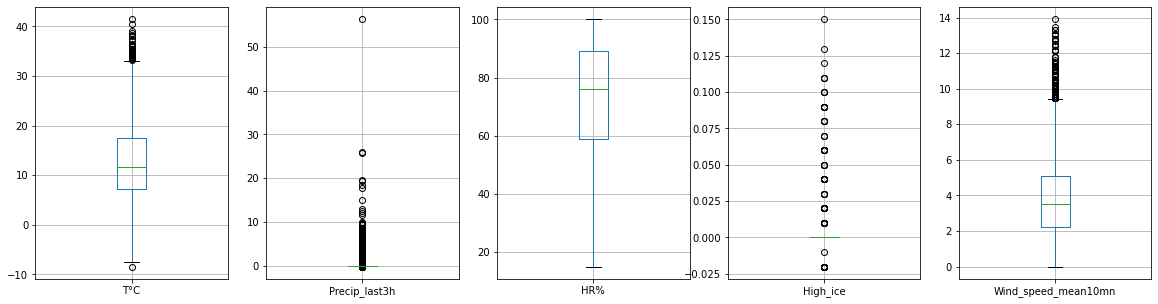

In [11]:
# Boxplot pour visualiser les valeurs de describe ci-dessus:
fig = plt.figure(figsize = (20,5))
plt.subplot(1,5,1)
df.boxplot(column=['T°C']);
plt.subplot(1,5,2)
df.boxplot(column=['Precip_last3h']);
plt.subplot(1,5,3)
df.boxplot(column=['HR%']);
plt.subplot(1,5,4)
df.boxplot(column=['High_ice']);
plt.subplot(1,5,5)
df.boxplot(column=['Wind_speed_mean10mn']);

**Observations:**
- Il est surprenant de voir des précipitations et hauteur de neige en valeur négatives, il y a sûrement une erreur (les valeurs min devant être à 0)
- Les boxplots des colonnes précipitation et hauteur de neiges sont également étonnant, il faudra prévoir de regarder plus en détail ces 2 colonnes par la suite
- Les données sont relevées toutes les 3h ce qui explique le peu de donnnées (9943 au total), il faudra faire attention lors de la fusion avec le df compteur vélo 

In [12]:
# Enregister le nouveau df sous format csv
df.to_csv('2018-2021_donnees-meteo.csv')